# Tree Cover Loss Analysis

## Step 1. Import Libraries

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex, Image

## Step 2. Prepare data from [Global Forest Watch](https://www.globalforestwatch.org/)

Global forest watch sources its data from a [University of Maryland time-series analysis of Landsat images](http://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html) that show global forest extent and change. These data can be downloaded for free, as .tiff files.

Following is an example of what these files look like rendered using QGIS, in Syria, covering the period from 2000-2020. The intensity of the red color is commensurate with the intensity of forest cover loss.

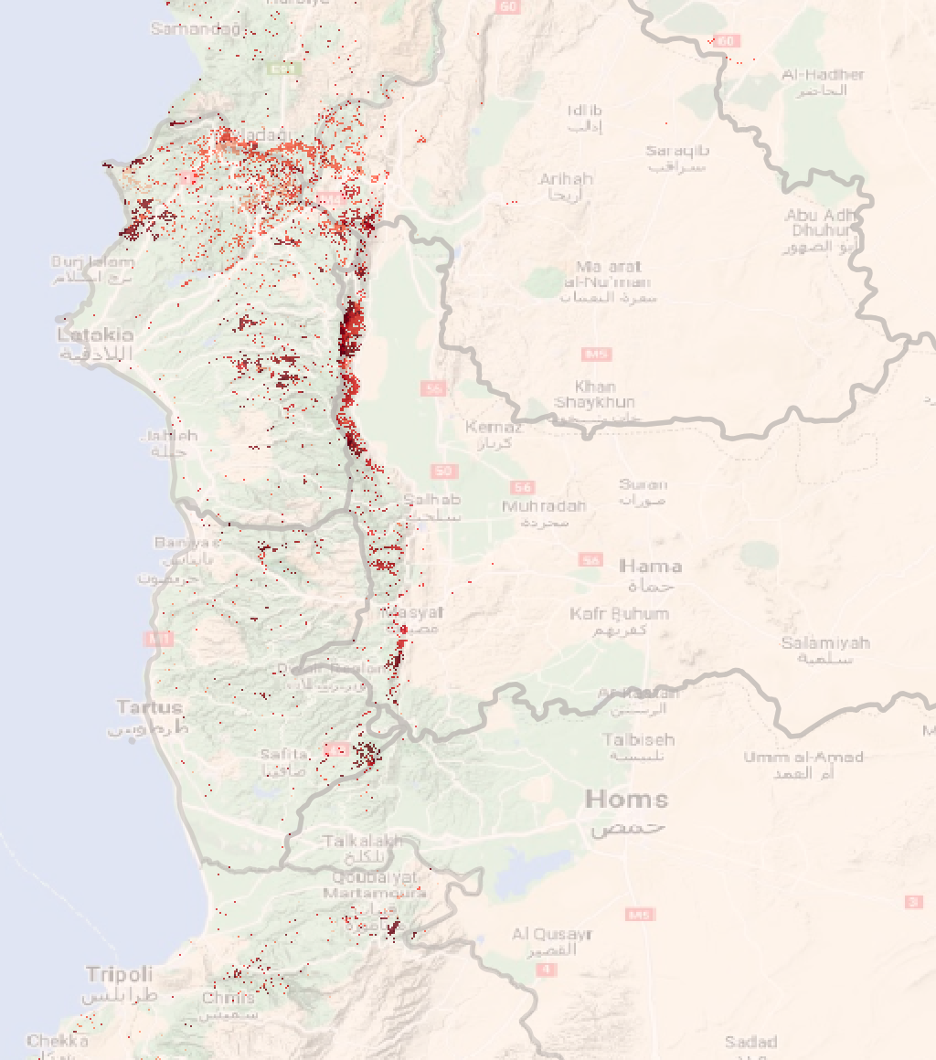

In [76]:
Image("images/syria-tree-loss-2.png")

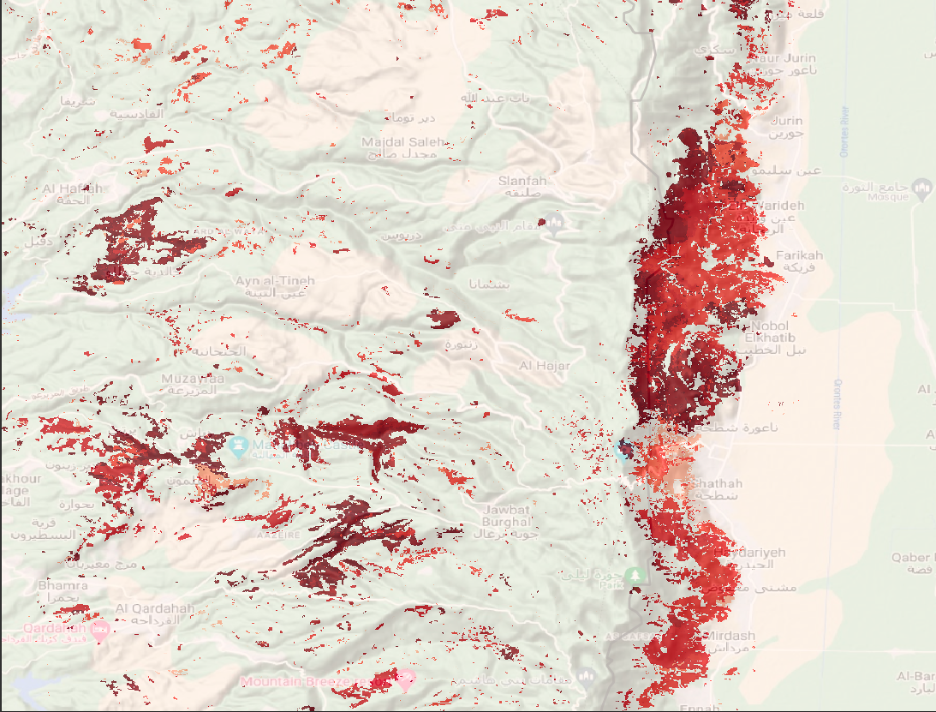

In [77]:
Image("images/syria-tree-loss-3.png")

In [78]:
# Read in treecover data loss dataset and metadata. The metadata will help us match admin id numbers with their actual names
df = pd.read_csv("data/treecover_loss_by_region__ha.csv")
meta = pd.read_csv("data/adm1_metadata.csv", usecols=["name", "adm1__id"])

# Merge data frames on adm1 column
merged_df = pd.merge(df, meta, left_on="adm1", right_on="adm1__id", how="left")

# Drop original adm1 column and rename merged adm1 column to "adm1"
merged_df.drop("adm1", axis=1, inplace=True)
merged_df.rename(columns={"name": "adm1"}, inplace=True)

# Preview the new merged data frame
merged_df.head()

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,adm1,adm1__id
0,SYR,2001,3.480518,763.156831,Al Ḥasakah,1
1,SYR,2001,23.259127,5419.176101,Aleppo,2
2,SYR,2001,7.879289,1948.088177,Ar Raqqah,3
3,SYR,2001,2.140265,545.701701,Dayr Az Zawr,7
4,SYR,2001,75.270909,20104.074759,Hamah,8


## Step 3. Create pivot table to show change in forest cover loss over time, by first administrative level.

In [79]:
# Create pivot table of tree cover loss by admin1 and year
pivot = pd.pivot_table(merged_df, values="umd_tree_cover_loss__ha",
                       index="adm1", columns="umd_tree_cover_loss__year",
                       aggfunc=sum, fill_value=0)

# Display the pivot table
display(pivot)

umd_tree_cover_loss__year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
adm1,,,,,,,,,,,,,,,,,,,,,
Al Ḥasakah,3.480518,0.986151,0.862637,0.123263,0.061612,0.062083,0.000000,2.227976,0.309338,0.868839,...,1.489113,0.370907,0.124082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aleppo,23.259127,2.558609,14.358696,7.035085,6.465869,4.662156,7.333947,120.965704,18.725133,4.921604,...,16.887510,37.336229,19.853886,0.994854,1.116550,7.650396,25.461913,123.576922,109.802907,82.457021
Ar Raqqah,7.879289,4.689905,1.565029,1.188662,0.874299,1.432591,2.629462,2.128434,4.065437,6.387455,...,2.317495,0.436470,0.125291,0.250553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dar`a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064731,0.258925,0.000000,0.064732,0.000000,0.000000,0.000000,0.000000,0.000000
Dayr Az Zawr,2.140265,0.188467,0.377624,0.696905,0.126386,0.000000,1.073532,0.762680,0.568986,0.251701,...,1.319054,0.314921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hamah,75.270909,21.656590,8.800606,8.246462,9.514644,155.613112,24.385281,12.506246,30.970247,34.212082,...,207.689804,158.491165,259.917182,1634.596085,1125.643516,1105.887974,425.235510,481.166452,1202.593810,536.263460
Hims,6.352807,0.507980,0.381551,0.253918,2.792863,0.317257,1.904211,0.127070,2.094730,1.143021,...,2.923788,4.262075,4.062676,43.459727,92.174943,23.728053,4.188380,4.507124,74.919512,183.112050
Idlib,27.095845,15.280434,24.910104,14.464419,12.279044,46.664039,34.823248,10.393510,7.070212,113.332822,...,1106.759225,74.325848,109.792240,93.491690,115.755690,311.652435,186.094799,131.866447,84.258604,55.678079
Lattakia,76.985513,88.706425,54.998993,71.267972,742.447252,65.291268,1480.024060,668.021859,54.883082,69.666617,...,4022.257680,968.074040,522.129303,501.735361,426.535367,588.007699,235.497610,351.082340,1356.140526,1622.487838


## Step 4. Calculate cumualative forest cover loss

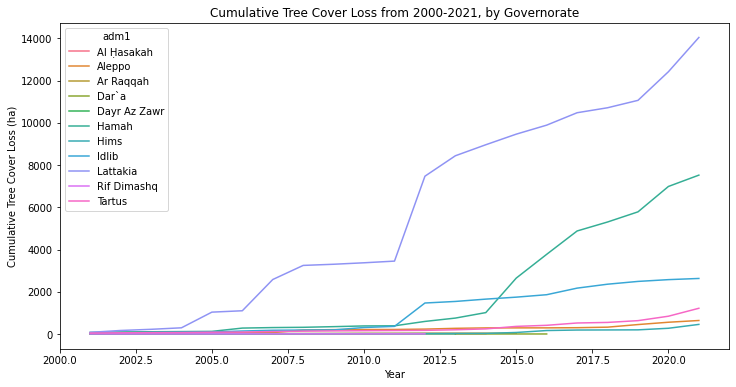

In [80]:
# Group data by adm1 and year, and calculate cumulative tree cover loss
grouped_df = merged_df.groupby(['adm1', 'umd_tree_cover_loss__year'])['umd_tree_cover_loss__ha'].sum().reset_index()
grouped_df['cummulative loss'] = grouped_df.groupby('adm1')['umd_tree_cover_loss__ha'].cumsum()

# Create line chart of cumulative tree cover loss over time, by admin
plt.figure(figsize=(12,6))
sns.lineplot(x='umd_tree_cover_loss__year', y='cummulative loss', hue='adm1', data=grouped_df)
plt.xlabel('Year')
plt.ylabel('Cumulative Tree Cover Loss (ha)')

# Customize the title for your area of interest and time period
plt.title('Cumulative Tree Cover Loss from 2000-2021, by Governorate')
plt.show()

## Step 5. Calculate total tree cover loss by administrative level 1, identify which account for the greatest losses, and then calculate their percent of the national total

In [81]:
# Group data by adm1 and calculate tree cover loss
total_loss = merged_df.groupby('adm1')['umd_tree_cover_loss__ha'].sum()

# Calculate percentage of the total tree cover loss for each adm1
percentage_loss = total_loss / total_loss.sum() * 100

# Get the admin1 with the highest tree cover loss
most_loss = total_loss.idxmax()
percentage_of_total = percentage_loss.max()

# Get the admin1 with the second highest tree cover loss
second_most_loss = total_loss.nlargest(2).iloc[-1]
second_most_loss_adm1 = total_loss.nlargest(2).index[-1]
percentage_of_total_2 = percentage_loss[second_most_loss_adm1]

# Get the admin1 with the third highest tree cover loss (repeat for additional areas)
third_most_loss = total_loss.nlargest(3).iloc[-1]
third_most_loss_adm1 = total_loss.nlargest(3).index[-1]
percentage_of_total_3 = percentage_loss[third_most_loss_adm1]

# Display the results (customize the local name for an admin1 area)

display(Markdown(f"The governorate with the most tree cover loss is {most_loss}, with {total_loss[most_loss]} hectares lost, which represents {percentage_of_total:.2f}% of the total loss across all admin1s."))
display(Markdown(f"The governorate with the second most tree cover loss is {second_most_loss_adm1}, with {second_most_loss} hectares lost, which represents {percentage_of_total_2:.2f}% of the total loss across all admin1s."))
display(Markdown(f"The governorate with the third most tree cover loss is {third_most_loss_adm1}, with {third_most_loss} hectares lost, which represents {percentage_of_total_3:.2f}% of the total loss across all admin1s."))


The governorate with the most tree cover loss is Lattakia, with 14045.481730543292 hectares lost, which represents 52.85% of the total loss across all admin1s.

The governorate with the second most tree cover loss is Hamah, with 7524.196461860809 hectares lost, which represents 28.31% of the total loss across all admin1s.

The governorate with the third most tree cover loss is Idlib, with 2629.7024648132574 hectares lost, which represents 9.90% of the total loss across all admin1s.